In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df = pd.read_csv("diminos_data.csv")

In [100]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [101]:
df.tail()

,order_id,order_placed_at,order_delivered_at
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358
14999,1538110,2023-03-27 23:58:20,2023-03-28 00:13:42.499311


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [103]:
df.isna().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

In [104]:
df1 = df.copy()

In [107]:
df1["order_id"].duplicated().sum()

np.int64(0)

In [108]:
df1.shape

(15000, 3)

In [109]:
df1.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

In [110]:
df1.columns = df1.columns.str.strip()

In [111]:
df1["order_placed_at"] = pd.to_datetime(df1["order_placed_at"])

In [112]:
df1["order_delivered_at"] = pd.to_datetime(df1["order_delivered_at"])

In [113]:
df1.dtypes

order_id                       int64
order_placed_at       datetime64[ns]
order_delivered_at    datetime64[ns]
dtype: object

In [114]:
(df1["order_delivered_at"] - df1["order_placed_at"]).dt.total_seconds()/60

0        17.140719
1        15.598754
2        15.104856
3        38.533657
4        16.176984
           ...    
14995    15.540156
14996    16.744549
14997    15.411271
14998    15.963506
14999    15.374989
Length: 15000, dtype: float64

In [115]:
df1["delivery_time_mins"] = round((df1["order_delivered_at"] - df1["order_placed_at"]).dt.total_seconds()/60).astype(int)

In [116]:
df1.dtypes

order_id                       int64
order_placed_at       datetime64[ns]
order_delivered_at    datetime64[ns]
delivery_time_mins             int64
dtype: object

In [117]:
df1.head()

,order_id,order_placed_at,order_delivered_at,delivery_time_mins
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,16
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,39
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16


In [118]:
df1[df1["delivery_time_mins"] < 0] # No invalid records 

,order_id,order_placed_at,order_delivered_at,delivery_time_mins


In [119]:
df1["delivery_time_mins"].describe()

count    15000.000000
mean        20.456400
std         96.161896
min         15.000000
25%         15.000000
50%         16.000000
75%         17.000000
max       7300.000000
Name: delivery_time_mins, dtype: float64

In [120]:
df1["delivery_time_mins"].min()

15

In [121]:
df1["delivery_time_mins"].max()

7300

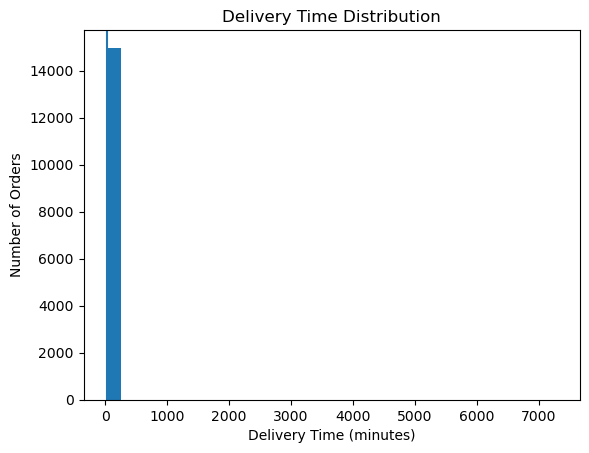

In [139]:
plt.figure()
plt.hist(df1["delivery_time_mins"], bins=30)
plt.axvline(31)
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Orders")
plt.title("Delivery Time Distribution")
plt.show()

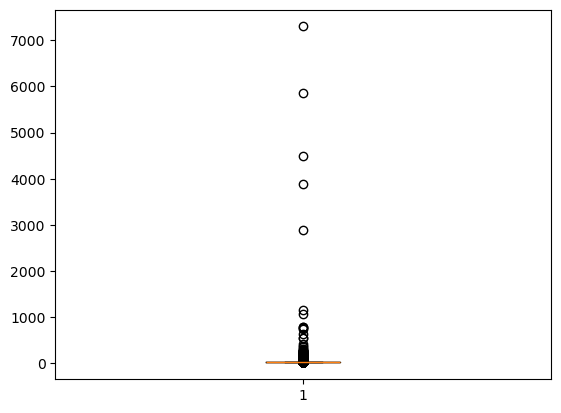

In [143]:
plt.boxplot(df1["delivery_time_mins"])
plt.show()

**95th Percentile on Order Delivery time should be less
than 31 mins.**

In [124]:
percentaile_95th = np.percentile(df1["delivery_time_mins"],95)

In [125]:
round(percentaile_95th)

27

In [141]:
if percentaile_95th <= 31:
    print("\n✅ Store meets Diminos (95th percentile ≤ 31 mins)")
else:
    print("\n❌ Store does NOT meet Diminos (Action Required)")


✅ Store meets Diminos (95th percentile ≤ 31 mins)


In [126]:
df1[df1["delivery_time_mins"] > 31]

,order_id,order_placed_at,order_delivered_at,delivery_time_mins
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,39
24,1523135,2023-03-01 01:11:53,2023-03-01 05:07:54.563978,236
47,1523158,2023-03-01 01:57:16,2023-03-01 02:30:19.851911,33
117,1523228,2023-03-01 04:59:04,2023-03-01 18:06:52.046891,788
174,1523285,2023-03-01 07:22:11,2023-03-01 08:12:51.906470,51
...,...,...,...,...
14841,1537952,2023-03-27 16:42:37,2023-03-27 17:43:13.294744,61
14855,1537966,2023-03-27 17:16:14,2023-03-27 17:49:07.476278,33
14899,1538010,2023-03-27 19:31:50,2023-03-27 20:08:26.866824,37
14939,1538050,2023-03-27 21:17:20,2023-03-27 21:54:03.464048,37


In [127]:
df1["Exceeding_31_min"] = df1["delivery_time_mins"] > 31

In [128]:
df1["Exceeding_31_min"].value_counts()

Exceeding_31_min
False    14468
True       532
Name: count, dtype: int64

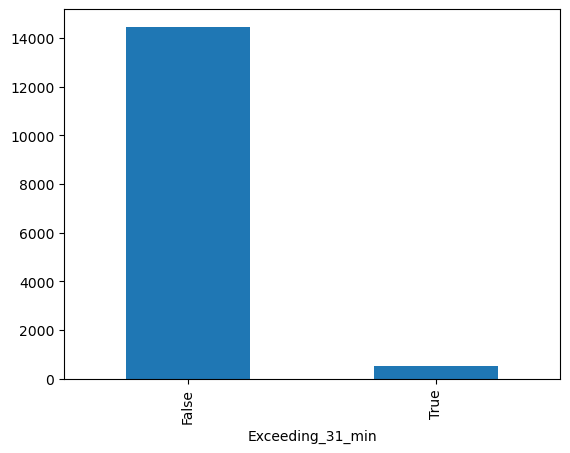

In [142]:
df1["Exceeding_31_min"].value_counts().plot(kind="bar")
plt.show()